# Apply PCA on MNIST datasets

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\user\Desktop\ML\datasets\digit_recognizer\train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape
# DF info
# label: target column with its specific value
# and all the other cols are pixel data of a number image

(42000, 785)

In [4]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
29016,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


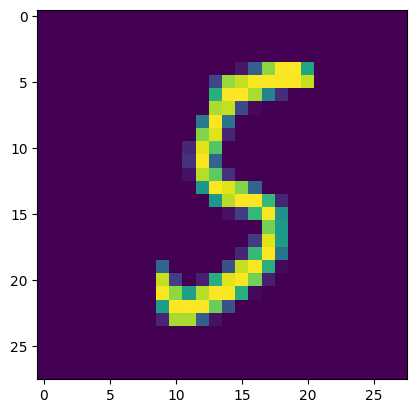

In [5]:
plt.imshow(df.iloc[19081,1:].values.reshape(28,28))

In [6]:
X = df.iloc[:,1:] # features 
y = df.iloc[:,0] # label

In [7]:
X.sample()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
36802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


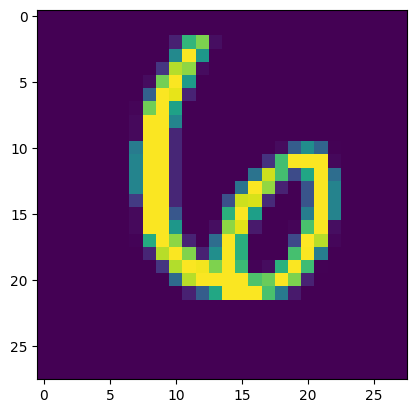

In [8]:
plt.imshow(X.iloc[14139,:].values.reshape(28,28))
# 28*28 = 784
# from above we can see that the image has been stored by each and every pixel
# 28 rows and 28 columns 
# each columns/feature representing single pixel
# that's why we are to see the number in the plot

## Train test split 

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(f"X_train Shape: {X_train.shape}\ny_train Shape: {y_train.shape}")
print(f"X_test Shape: {X_test.shape}\ny_test Shape: {y_test.shape}")

X_train Shape: (33600, 784)
y_train Shape: (33600,)
X_test Shape: (8400, 784)
y_test Shape: (8400,)


In [10]:
## Let's check the time duration how much it takes to predict the label with KNearestNeighbour
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)



KNeighborsClassifier()

In [11]:
import time
start=time.time()
y_pred_knn = knn.predict(X_test)
print(time.time()-start)

30.859584093093872


In [12]:
# let's check the accuracy
knn.score(X_test, y_test)

0.9648809523809524

### Applying PCA to get the almost same result

In [13]:
# step 1 standardise the columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [14]:
# now applying pca
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)


In [15]:
# now lets apply knn one more time to check the accuracy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_trf = knn.predict(X_test)
accuracy_score(y_test, y_pred_trf)

0.9407142857142857

In [20]:
# now lets create a loop to check for how many pc it get us the best accuracy
for i in range(1,785):
    pca = PCA(n_components = i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.fit_transform(X_test)

    knn = KNeighborsClassifier()
    knn.fit(X_train_trf, y_train)
    y_pred_trf = knn.predict(X_test_trf)
    if accuracy_score(y_test, y_pred_trf)>=0.85:
        print(f"for {i} number of pc accuracy is: {accuracy_score(y_test, y_pred_trf)}")

for 8 number of pc accuracy is: 0.8640476190476191
for 9 number of pc accuracy is: 0.8766666666666667


KeyboardInterrupt: 

In [22]:
# 2D visualization of pc 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)

In [24]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color = y_train_trf,
                 color_discrete_sequence = px.colors.qualitative.G10)
fig.show()

In [25]:
## 3-D visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)

In [30]:
import plotly.express as px
y_train_trf = y_train.astype(str)

fig = px.scatter_3d(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 z=X_train_trf[:,2],
                 color=y_train_trf,)
fig.show()

In [32]:
# finding the optimum number of principle
pca.explained_variance_ #eigen value

array([40.67111198, 29.17023401, 26.74459621])

In [33]:
pca.components_.shape

(3, 784)

In [34]:
pca.explained_variance_ratio_ # gives us the percent

array([0.05785192, 0.0414927 , 0.03804239])

In [35]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)

In [36]:
# in general case we usally take the data where 90% of variance is explained
np.cumsum(pca.explained_variance_ratio_) 

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

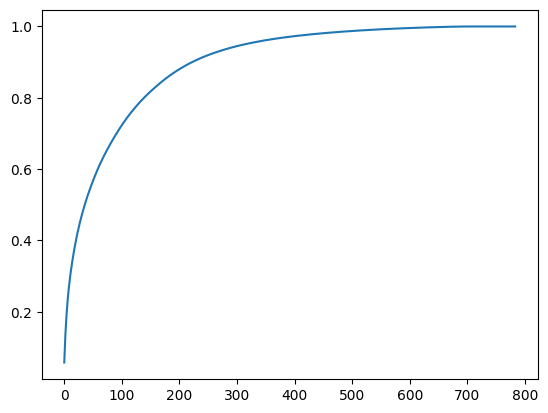

In [39]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
# from the graph we can see: almost 200 is giving us the 90% variance from the original data